# First_EDA

**Background:** This project involves creating multiple models to predict patient outcome from copy number variants, transcriptome data, and their combined dataset. In order to start developing these models, I first need to know what these data look like, as well as how the quality is. 

**Purpose:** To determine what the data looks like

**Methods:**
>1. Introduction
>2. Inits

**Conclusions:**
* There are unique patients in every sub-challenge
* There is class imbalance, with 75-85% of the patients having survival_status=1

# Inits

## Imports

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context(context='notebook', font_scale=1.5)

import logging
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.INFO)

## Definitions

## Funcs

# Sub-Challenge 1

## Load the subchallenge 1 data (Transcriptome)

In [ ]:
sc1_Phase1_GE_FeatureMatrix = pd.read_csv('./../../data/raw/sc1_Phase1_GE_FeatureMatrix.tsv', sep='\t')
sc1_Phase1_GE_Outcome = pd.read_csv('./../../data/raw/sc1_Phase1_GE_Outcome.tsv', sep='\t')
sc1_Phase1_GE_Phenotype = pd.read_csv('./../../data/raw/sc1_Phase1_GE_Phenotype.tsv', sep='\t')

## Gene Expression data summary

### How many patients are there?
* There are 377 patients with a single entry per patient

In [17]:
# Calculating the total # of rows
total_rows = sc1_Phase1_GE_FeatureMatrix['PATIENTID'].shape[0]

# Calculating the unique # of patients
unique_rows = sc1_Phase1_GE_FeatureMatrix['PATIENTID'].nunique()

print(f'There are {unique_rows} unique patients with a total of {total_rows} total rows of data')

There are 377 unique patients with a total of 377 total rows of data


### How many genes are measured?
* There are 19,336 genes measured

In [18]:
sc1_Phase1_GE_FeatureMatrix.shape[1]

19336

### What are the summary metrics of the genes?
* The genes are distributed with a right-skewed, non-normal distribution

In [19]:
# Calculating the summary metrics of the gene expression
sc1_Phase1_GE_FeatureMatrix_summary = sc1_Phase1_GE_FeatureMatrix.describe()

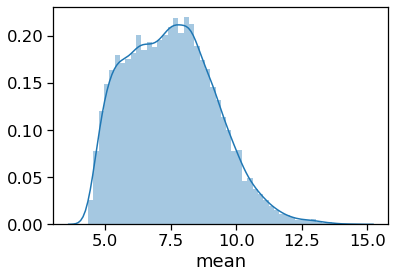

In [25]:
sns.distplot(sc1_Phase1_GE_FeatureMatrix_summary.loc['mean'])

The log2 expression values of genes is distributed with a right skewed, non-normal distribution

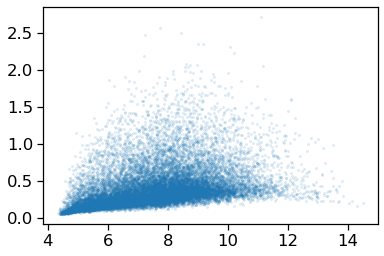

In [39]:
plt.plot(sc1_Phase1_GE_FeatureMatrix_summary.loc['mean'], 
         sc1_Phase1_GE_FeatureMatrix_summary.loc['std'], 
         'o', 
         ms=2,
         alpha=0.1)

There are many genes with high variance for their mean expression level

### Are there missing gene expression values?
* No missing gene expression values

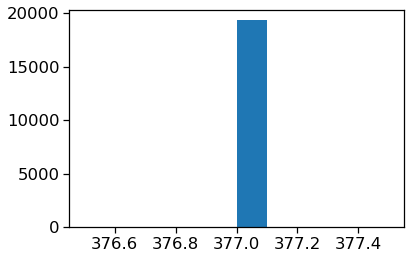

In [31]:
# Plotting the distribution of counts of each gene in the expression matrix
plt.hist(sc1_Phase1_GE_FeatureMatrix_summary.loc['count']);

## Phenotype data summary

### What is the phenotype data?
* Gives the sex, race, WHO grading of the cancer, and cancer type of each patient

In [44]:
sc1_Phase1_GE_Phenotype.head(2)

,PATIENTID,SEX,RACE,WHO_GRADING,CANCER_TYPE
0,patient_290,,NaN,II,ASTROCYTOMA
1,patient_394,,NaN,NaN,GBM


### How many patients are included in the Phenotype data
* There are 377 unique patients with a total of 377 total rows of data

In [42]:
# Calculating the total # of rows
total_phenotype_rows = sc1_Phase1_GE_Phenotype['PATIENTID'].shape[0]

# Calculating the unique # of patients
unique_phenotype_rows = sc1_Phase1_GE_Phenotype['PATIENTID'].nunique()

print(f'There are {unique_phenotype_rows} unique patients with a total of {total_phenotype_rows} total rows of data')

There are 377 unique patients with a total of 377 total rows of data


### What is the distribution of sex in the patients?
* The data is made up of ~49% males, 31% females, and 20% are missing a sex label

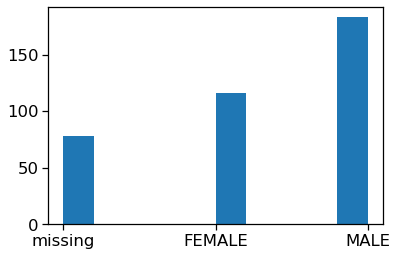

In [59]:
# Fill the missing values with 'missing'
sc1_Phase1_GE_Phenotype_sex_with_fillna = sc1_Phase1_GE_Phenotype['SEX'].replace(np.nan, 'missing').replace(' ','missing')

# Plot the distribution of men/women/missing in the data
plt.hist(sc1_Phase1_GE_Phenotype_sex_with_fillna);

In [63]:
sc1_Phase1_GE_Phenotype_sex_with_fillna.value_counts() / sc1_Phase1_GE_Phenotype.shape[0]

MALE       0.485411
FEMALE     0.307692
missing    0.206897
Name: SEX, dtype: float64

The data is made up of ~49% males, 31% females, and the remaining are missing a sex label

### What is the distribution of Race in the data
* The majority (~250 counts) of race data is from white/caucasions, with 100 being missing, and a few comeing from Asian and Black patients

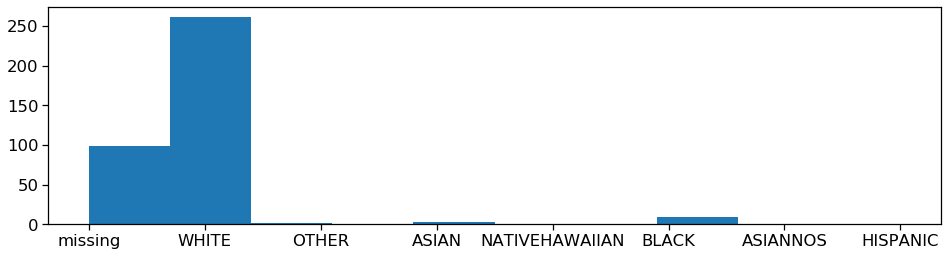

In [71]:
sc1_Phase1_GE_Phenotype_race_with_fillna = sc1_Phase1_GE_Phenotype['RACE'].replace(np.nan, 'missing')

plt.figure(figsize=(16,4))
plt.hist(sc1_Phase1_GE_Phenotype_race_with_fillna);

### What is the distribution of WHO Grading?
* ~36% of patients are missing a WHO grading, with ~27% having a grade IV, 19% having a grade II, and so on

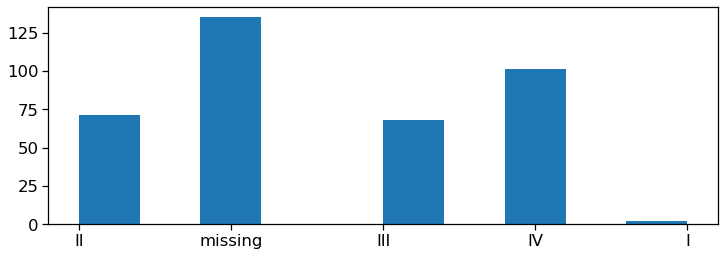

In [77]:
sc1_Phase1_GE_Phenotype_who_grading_with_fillna = sc1_Phase1_GE_Phenotype['WHO_GRADING'].replace(np.nan, 'missing')

plt.figure(figsize=(12,4))
plt.hist(sc1_Phase1_GE_Phenotype_who_grading_with_fillna);

In [79]:
sc1_Phase1_GE_Phenotype_who_grading_with_fillna.value_counts() / sc1_Phase1_GE_Phenotype_who_grading_with_fillna.shape[0]

missing    0.358090
IV         0.267905
II         0.188329
III        0.180371
I          0.005305
Name: WHO_GRADING, dtype: float64

~36% of patients don't have a WHO grading, with ~27% having a grade IV, 19% having a grade II, and so on

### What is the distribution of Cancer type?
* ~43% of patients have GBM cancer type, ~29% Astrocytomas, 12.5% Oligodendrogliomas, and ~15% being mixed or unknown. No missing labels

GBM                  0.429708
ASTROCYTOMA          0.291777
UNKNOWN              0.135279
OLIGODENDROGLIOMA    0.124668
MIXED                0.015915
UNCLASSIFIED         0.002653
Name: CANCER_TYPE, dtype: float64

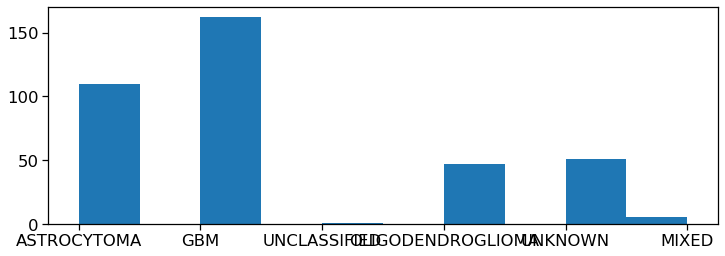

In [80]:
sc1_Phase1_GE_Phenotype_cancer_type_with_fillna = sc1_Phase1_GE_Phenotype['CANCER_TYPE'].replace(np.nan, 'missing')

plt.figure(figsize=(12,4))
plt.hist(sc1_Phase1_GE_Phenotype_cancer_type_with_fillna);

sc1_Phase1_GE_Phenotype_cancer_type_with_fillna.value_counts() / sc1_Phase1_GE_Phenotype_cancer_type_with_fillna.shape[0]

~43% of patients have GBM cancer type, ~29% Astrocytomas, 12.5% Oligodendrogliomas, and ~15% being mixed or unknown

## Outcome data summary

### What is contained in the Outcome data summary?
* The outcome data contains the binary surival status of each patient

In [82]:
sc1_Phase1_GE_Outcome.head()

,PATIENTID,SURVIVAL_STATUS
0,patient_290,1
1,patient_394,1
2,patient_81,1
3,patient_307,1
4,patient_14,1


The outcome data contains the surival status of each patient

### What is the distribution of survival status?
* The majority of patients have a survival status of 1 (meaning they died before the last scheduled checkup)
* These data are highly imbalanced towards people who have died

1    0.864721
0    0.135279
Name: SURVIVAL_STATUS, dtype: float64

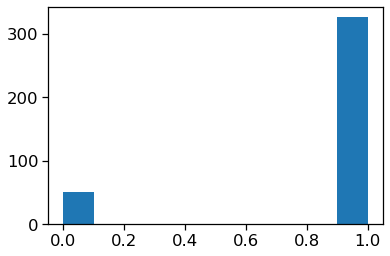

In [84]:
sc1_Phase1_GE_Outcome_survival_status_with_fillna = sc1_Phase1_GE_Outcome['SURVIVAL_STATUS'].replace(np.nan, 'missing')

plt.hist(sc1_Phase1_GE_Outcome_survival_status_with_fillna);

sc1_Phase1_GE_Outcome_survival_status_with_fillna.value_counts() / sc1_Phase1_GE_Outcome_survival_status_with_fillna.shape[0]

The majority of patients have a survival status of 1 (meaning they died before the last scheduled checkup)

These data are highly imbalanced towards people who have died

### Next question

# Sub-Challenge 2

## Load data

In [85]:
# Load the subchallenge 2 data (CNV)
sc2_Phase1_CN_FeatureMatrix = pd.read_csv('./../../data/raw/sc2_Phase1_CN_FeatureMatrix.tsv', sep='\t')
sc2_Phase1_CN_Outcome = pd.read_csv('./../../data/raw/sc2_Phase1_CN_Outcome.tsv', sep='\t')
sc2_Phase1_CN_Phenotype = pd.read_csv('./../../data/raw/sc2_Phase1_CN_Phenotype.tsv', sep='\t')

## CNV data summary

### How many patients are in the CNV feature data?
* There are only 174 patients in the copy number variation data

In [97]:
# Calculating the total # of rows
sc2_Phase1_CN_FeatureMatrix_total_rows = sc2_Phase1_CN_FeatureMatrix['PATIENTID'].shape[0]

# Calculating the unique # of patients
sc2_Phase1_CN_FeatureMatrix_unique_rows = sc2_Phase1_CN_FeatureMatrix['PATIENTID'].nunique()

print(f'There are {sc2_Phase1_CN_FeatureMatrix_unique_rows} unique patients with a total of \
{sc2_Phase1_CN_FeatureMatrix_total_rows} total rows of data')


There are 174 unique patients with a total of 174 total rows of data


### What is the overlap in patients between the transcript data and CNV feature data?
* There are 138 patients who common to both sub-challenge 1 and 2. Meaning each dataset has a unique set of patients

In [98]:
common_patient_ids_sc1_and_sc2 = len(set(sc2_Phase1_CN_FeatureMatrix['PATIENTID']).intersection(sc1_Phase1_GE_FeatureMatrix['PATIENTID']))

print(f'There are {common_patient_ids_sc1_and_sc2} common patients between sub-challenge 1 and 2')

There are 138 common patients between sub-challenge 1 and 2


There are only 138 patients common to both sub-challenge 1 and 2

### How many CNV features are there?
* There are 812 CNV features

In [99]:
sc2_Phase1_CN_FeatureMatrix.shape[1]

812

### What does the distribution of CNV features look like?
* Most CNV values are near 0, with a long right tail

In [100]:
# Calculating the summary metrics of the gene expression
sc2_Phase1_CN_FeatureMatrix_summary = sc2_Phase1_CN_FeatureMatrix.describe()

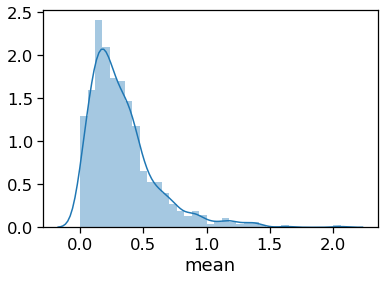

In [102]:
sns.distplot(sc2_Phase1_CN_FeatureMatrix_summary.loc['mean'])

Most CNV values are near 0, with a long right tail

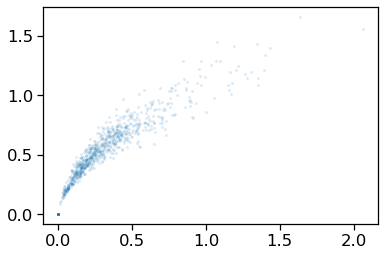

In [104]:
plt.plot(sc2_Phase1_CN_FeatureMatrix_summary.loc['mean'], 
         sc2_Phase1_CN_FeatureMatrix_summary.loc['std'], 
         'o', 
         ms=2,
         alpha=0.1)

There is a cubic-looking relationship between the mean CNV and its variance

### Are there missing expression CNV values?
* No, there are no missing CNV values

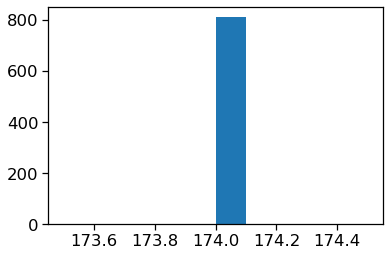

In [106]:
# Plotting the distribution of counts of each gene in the expression matrix
plt.hist(sc2_Phase1_CN_FeatureMatrix_summary.loc['count']);

### Next Question

## Phenotype data summary

### Is the phenotype data the same as in Sub-Challenge 1?
* Yes, all of the phenotype data is the same as in Sub-Challenge 1, except the fact that there are less patients in this dataset

In [113]:
merged_sc1_sc2_Phenotype = pd.merge(sc1_Phase1_GE_Phenotype,
         sc2_Phase1_CN_Phenotype,
         on=['PATIENTID'])\
    .fillna('-1')

# Checking if all columns of sc1 and sc2 matched
print(np.all(merged_sc1_sc2_Phenotype['SEX_x'] == merged_sc1_sc2_Phenotype['SEX_y']))
print(np.all(merged_sc1_sc2_Phenotype['RACE_x'] == merged_sc1_sc2_Phenotype['RACE_y']))
print(np.all(merged_sc1_sc2_Phenotype['WHO_GRADING_x'] == merged_sc1_sc2_Phenotype['WHO_GRADING_y']))
print(np.all(merged_sc1_sc2_Phenotype['CANCER_TYPE_x'] == merged_sc1_sc2_Phenotype['CANCER_TYPE_y']))

## Outcome data summary

### Is the Outcome data the same as in Sub-Challenge 1?
* Yes, the outcome data is the same as in Sub-Challenge 1

In [124]:
merged_sc1_sc2_Outcome = pd.merge(sc1_Phase1_GE_Outcome,
         sc2_Phase1_CN_Outcome,
         on=['PATIENTID'])\
    .fillna('-1')

# Checking if all columns of sc1 and sc2 matched
print(np.all(merged_sc1_sc2_Outcome['SURVIVAL_STATUS_x'] == merged_sc1_sc2_Outcome['SURVIVAL_STATUS_y']))

True


### How is the survival data distributed?
* Like Sub-Challenge 1, there are far more cases of `survival_status`=1 (75%), so we have a class imbalance problem

1    0.752874
0    0.247126
Name: SURVIVAL_STATUS, dtype: float64

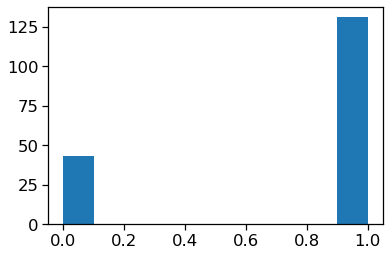

In [135]:
sc2_Phase1_CN_Outcome_survival_status_with_fillna = sc2_Phase1_CN_Outcome['SURVIVAL_STATUS'].replace(np.nan, 'missing')

plt.hist(sc2_Phase1_CN_Outcome_survival_status_with_fillna);

sc2_Phase1_CN_Outcome_survival_status_with_fillna.value_counts() / sc2_Phase1_CN_Outcome_survival_status_with_fillna.shape[0]

Like Sub-Challenge 1, there are far more cases of `survival_status`=1, so we have a class imbalance problem

# Sub-Challenge 3

## Load data

In [125]:
# Load the subchallenge 2 data (CNV)
sc3_Phase1_CN_GE_FeatureMatrix = pd.read_csv('./../../data/raw/sc3_Phase1_CN_GE_FeatureMatrix.tsv', sep='\t')
sc3_Phase1_CN_GE_Outcome = pd.read_csv('./../../data/raw/sc3_Phase1_CN_GE_Outcome.tsv', sep='\t')
sc3_Phase1_CN_GE_Phenotype = pd.read_csv('./../../data/raw/sc3_Phase1_CN_GE_Phenotype.tsv', sep='\t')

## CNV and gene expression feature data summary

### What is contained in the feature matrix?
* There are 166 rows with 20,147 columns
* These data contain both gene expression levels and CNV values

In [126]:
sc3_Phase1_CN_GE_FeatureMatrix.shape

(166, 20147)

There are 166 rows with 20,147 features

In [127]:
sc3_Phase1_CN_GE_FeatureMatrix.head()

,PATIENTID,A1BG,A1BG.AS1,A1CF,A2M,A2M.AS1,A2ML1,A4GALT,A4GNT,AA06,...,22q11.22,22q11.23,22q12.1,22q12.2,22q12.3,22q13.1,22q13.2,22q13.31,22q13.32,22q13.33
0,patient_100,6.712669,6.689301,5.629170,12.794882,5.952521,6.266316,6.884509,6.139782,6.421307,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,patient_102,6.417048,6.581860,5.353415,13.297073,5.960088,5.321208,7.095273,5.896738,6.277470,...,0.000000,0.000000,0.000000,1.087516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,patient_104,6.496176,6.821401,5.388386,12.559299,6.171418,5.382789,7.073508,6.036521,6.315204,...,0.000000,0.000000,0.726699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,patient_117,7.018971,6.520754,5.437291,12.649568,6.401446,5.018791,6.627632,6.195179,6.276527,...,0.729810,0.000000,0.593759,0.663731,0.599695,0.000000,0.000000,0.620058,0.656618,0.656618
4,patient_119,6.493741,6.516461,5.354844,12.494806,6.555188,5.556890,6.750667,6.001066,6.338923,...,0.740904,1.065425,0.908043,2.020120,1.839099,1.101582,1.093675,0.885572,0.634195,0.000000


These data contain both gene expression levels and CNV values

### How many patients are in the Sub-Challenge 3 data?
* There are 166 unique patients with a total of 166 total rows of data

In [128]:
# Calculating the total # of rows
sc3_Phase1_CN_GE_FeatureMatrix_total_rows = sc3_Phase1_CN_GE_FeatureMatrix['PATIENTID'].shape[0]

# Calculating the unique # of patients
sc3_Phase1_CN_GE_FeatureMatrix_unique_rows = sc3_Phase1_CN_GE_FeatureMatrix['PATIENTID'].nunique()

print(f'There are {sc3_Phase1_CN_GE_FeatureMatrix_unique_rows} unique patients with a total of \
{sc3_Phase1_CN_GE_FeatureMatrix_total_rows} total rows of data')

There are 166 unique patients with a total of 166 total rows of data


### How many of the Sub-Challenge 3 patients overlap with Sub-Challenges 1 and 2?
* There are 142 common patients between sub-challenge 3 (166) and 1 (377)
* There are 161 common patients between sub-challenge 3 (166) and 2 (174)
* So, there are unique patients in every Sub-Challenge
* There are 138 unique patients in all three sub-challenges

In [145]:
{1,2,3}.difference({3})

{1, 2}

In [163]:
sc1_set=set(sc1_Phase1_GE_FeatureMatrix['PATIENTID'])
sc2_set=set(sc2_Phase1_CN_FeatureMatrix['PATIENTID'])
sc3_set=set(sc3_Phase1_CN_GE_FeatureMatrix['PATIENTID'])

patients_in_sc1_only_list = list(sc1_set.difference(sc3_set.union(sc2_set)))

In [168]:
sc1_Phase1_GE_Outcome\
    .loc[sc1_Phase1_GE_Outcome['PATIENTID'].isin(list(sc1_set.intersection(sc3_set.intersection(sc2_set))))]\
    ['SURVIVAL_STATUS']\
    .value_counts()

1    107
0     31
Name: SURVIVAL_STATUS, dtype: int64

In [167]:
sc1_Phase1_GE_Outcome\
    .loc[sc1_Phase1_GE_Outcome['PATIENTID'].isin(patients_in_sc1_only_list)]\
    ['SURVIVAL_STATUS']\
    .value_counts()

1    215
0     20
Name: SURVIVAL_STATUS, dtype: int64

In [132]:
common_patient_ids_sc3_and_sc1 = len(set(sc3_Phase1_CN_GE_FeatureMatrix['PATIENTID']).intersection(sc1_Phase1_GE_FeatureMatrix['PATIENTID']))
common_patient_ids_sc3_and_sc2 = len(set(sc3_Phase1_CN_GE_FeatureMatrix['PATIENTID']).intersection(sc2_Phase1_CN_FeatureMatrix['PATIENTID']))

print(f'There are {common_patient_ids_sc3_and_sc1} common patients between sub-challenge 3 and 1')
print(f'There are {common_patient_ids_sc3_and_sc2} common patients between sub-challenge 3 and 2')

There are 142 common patients between sub-challenge 3 and 1
There are 161 common patients between sub-challenge 3 and 2


### How is the outcome data distributed?
* There are ~75% survival_status=1 entries

1    0.759036
0    0.240964
Name: SURVIVAL_STATUS, dtype: float64

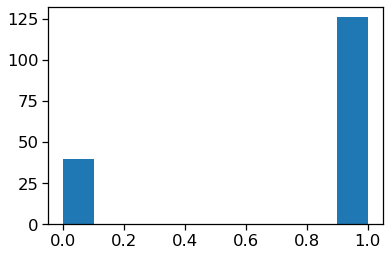

In [136]:
sc3_Phase1_CN_GE_Outcome_survival_status_with_fillna = sc3_Phase1_CN_GE_Outcome['SURVIVAL_STATUS'].replace(np.nan, 'missing')

plt.hist(sc3_Phase1_CN_GE_Outcome_survival_status_with_fillna);

sc3_Phase1_CN_GE_Outcome_survival_status_with_fillna.value_counts() / sc3_Phase1_CN_GE_Outcome_survival_status_with_fillna.shape[0]

In [179]:
from skfeature.function.similarity_based import SPEC

In [177]:
%%time

W_spec = SPEC.spec(X=sc1_Phase1_GE_FeatureMatrix.set_index('PATIENTID').values)

CPU times: user 1min 52s, sys: 3min 50s, total: 5min 43s
Wall time: 14.3 s


In [180]:
sc1_Phase1_GE_FeatureMatrix.shape

(377, 19336)

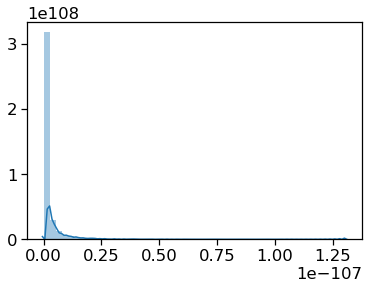

In [182]:
sns.distplot(W_spec)

In [216]:
sc1_Phase1_GE_cov = 100 * (sc1_Phase1_GE_FeatureMatrix_summary.loc['std'] / sc1_Phase1_GE_FeatureMatrix_summary.loc['mean'])

In [219]:
np.quantile(sc1_Phase1_GE_cov, q=[0.25])[0]

3.0597331537757597

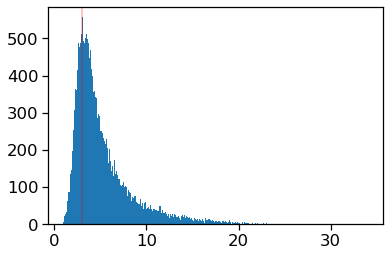

In [215]:
plt.hist(sc1_Phase1_GE_cov, bins=300)

ax = plt.gca()
ax.axvline(3.05, c='r', alpha=0.3)
#ax.set_xscale('log')